In [1]:
!pip install visualkeras
!pip install np_utils
!pip install keras
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56438 sha256=5369b69e48f38a300806717e7a78c5232407fd381423d7b75f1a02022eb245a3
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# from keras.utils.np_utils import to_categorical
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, Dense, Flatten,MaxPool2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.utils import  plot_model
from tensorflow.keras.callbacks import ModelCheckpoint , EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from itertools import product

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import visualkeras

import warnings
warnings.filterwarnings("ignore")

In [3]:
#connecting Google colab in Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
x_train = pd.read_csv('/content/drive/MyDrive/Masters/Neural Networks/dataset/train.csv')
x_test = pd.read_csv('/content/drive/MyDrive/Masters/Neural Networks/dataset/test.csv')

In [5]:
x_train.head().style.background_gradient(cmap='Dark2_r')

In [6]:
x_train.describe().style.background_gradient(cmap='Dark2_r')

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455

In [7]:
x_train.isnull().sum().sum()

0

In [8]:
x_test.isnull().sum().sum()

0

In [9]:
y_train = x_train['label']
x_train = x_train.drop(['label'], axis=1)

In [10]:
pd.Series(y_train).value_counts().rename_axis('unique_values').to_frame('counts')

,counts
unique_values,
1,4684
7,4401
3,4351
9,4188
2,4177
6,4137
0,4132
4,4072
8,4063


In [11]:
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


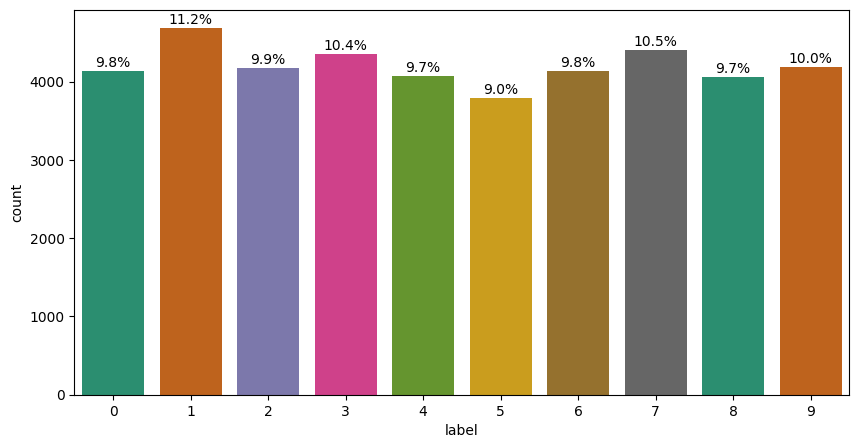

In [12]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x = y_train, palette = 'Dark2')
t= len(y_train)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / t:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.show()

In [13]:
print("Shape of training data", x_train.shape)
print("\nShape of test data", x_test.shape)

Shape of training data (42000, 784)

Shape of test data (28000, 784)


In [14]:
x_train = x_train.values.reshape(-1,28,28,1)
x_test = x_test.values.reshape(-1,28,28,1)

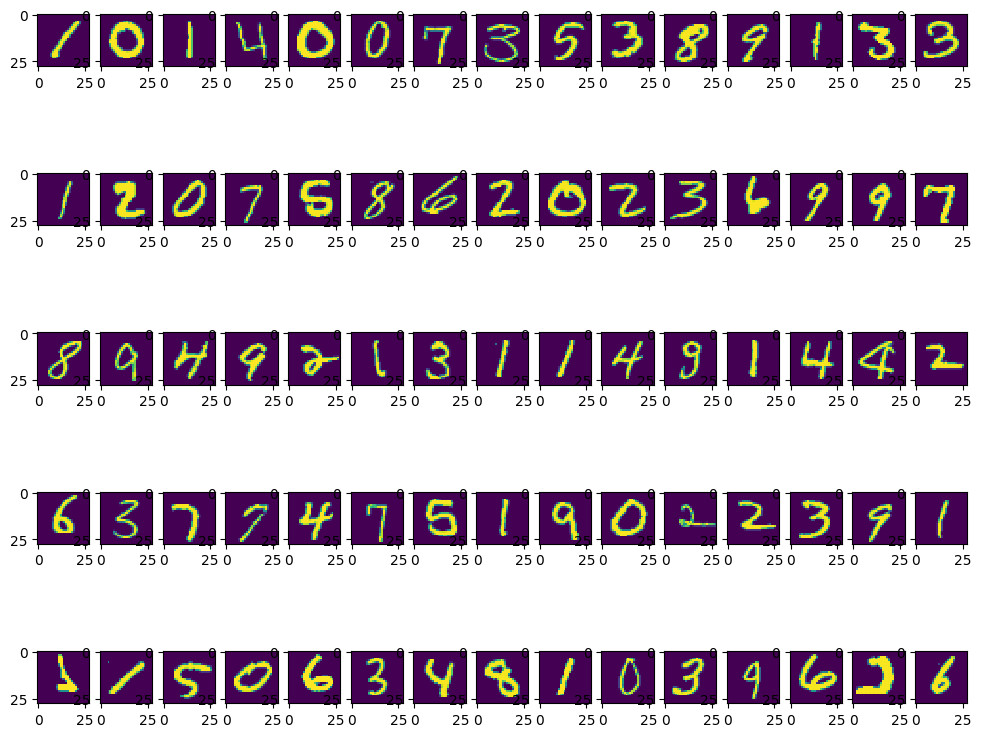

In [15]:
plt.figure(figsize=(12,10))
x, y = 15, 5
for i in range(75):
    plt.subplot(y, x, i+1)
    plt.imshow(x_train[i],interpolation='nearest')
plt.show()

In [16]:
x_train = x_train/255
x_test = x_test/255

In [17]:
y_categ_train = to_categorical(y_train,K)

In [18]:
y_train.head(1)

0    1
Name: label, dtype: int64

In [19]:
print("\n Encoded y_train first row",y_categ_train[1])


 Encoded y_train first row [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [20]:
from sklearn.model_selection import train_test_split
x_train1, x_val, y_train1, y_val = train_test_split(x_train, y_categ_train, test_size = 0.1, random_state=42)

In [21]:
from tensorflow.keras.layers import BatchNormalization
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import MaxPooling2D

In [22]:

model = Sequential()                                 # Linear stacking of layers

# Convolution Layer 1
model.add(Conv2D(32, (3, 3), input_shape=(28,28,1))) # 32 different 3x3 kernels -- so 32 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
convLayer01 = Activation('relu')                     # activation
model.add(convLayer01)

# Convolution Layer 2
model.add(Conv2D(32, (3, 3)))                        # 32 different 3x3 kernels -- so 32 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
model.add(Activation('relu'))                        # activation
convLayer02 = MaxPooling2D(pool_size=(2,2))          # Pool the max values over a 2x2 kernel
model.add(convLayer02)

# Convolution Layer 3
model.add(Conv2D(64,(3, 3)))                         # 64 different 3x3 kernels -- so 64 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
convLayer03 = Activation('relu')                     # activation
model.add(convLayer03)

# Convolution Layer 4
model.add(Conv2D(64, (3, 3)))                        # 64 different 3x3 kernels -- so 64 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
model.add(Activation('relu'))                        # activation
convLayer04 = MaxPooling2D(pool_size=(2,2))          # Pool the max values over a 2x2 kernel
model.add(convLayer04)
model.add(Flatten())                                 # Flatten final 4x4x64 output matrix into a 1024-length vector

# Fully Connected Layer 5
model.add(Dense(512))                                # 512 FCN nodes
model.add(BatchNormalization())                      # normalization
model.add(Activation('relu'))                        # activation

# Fully Connected Layer 6
model.add(Dropout(0.2))                              # 20% dropout of randomly selected nodes
model.add(Dense(10))                                 # final 10 FCN nodes
model.add(Activation('softmax'))                     # softmax activation

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 26, 26, 32)        128       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 26, 26, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 24, 24, 32)        128       
 chNormalization)                                                
                                                                 
 activation_1 (Activation)   (None, 24, 24, 32)        0

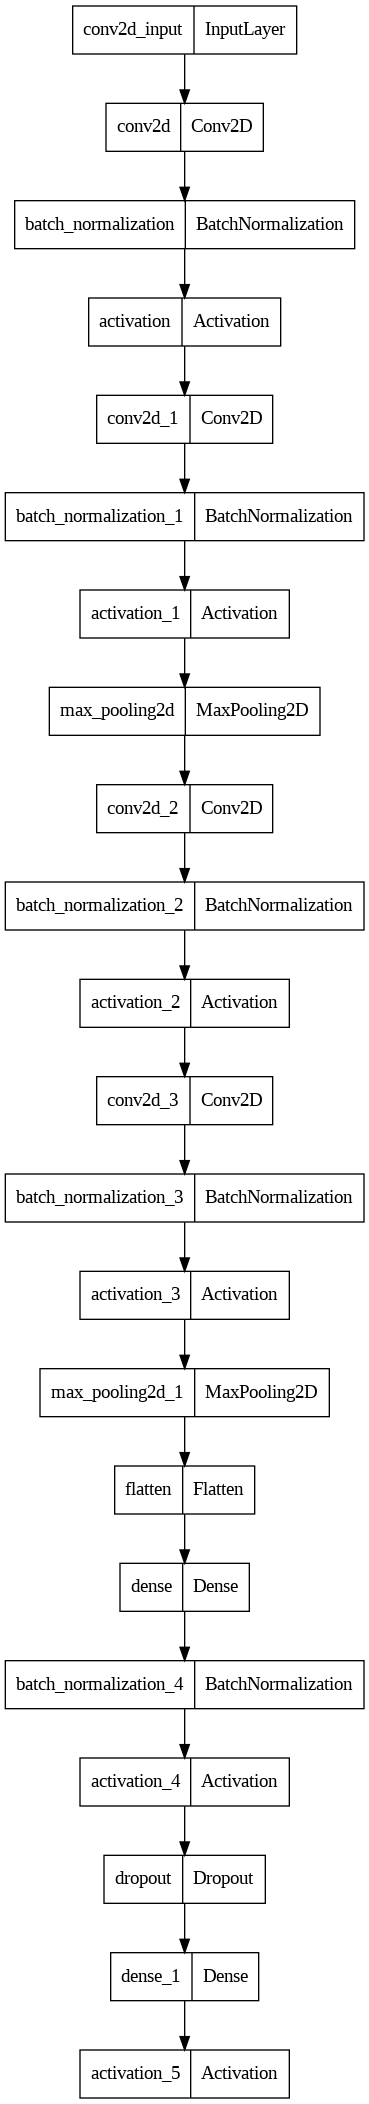

In [24]:
plot_model(model, to_file='model.png')

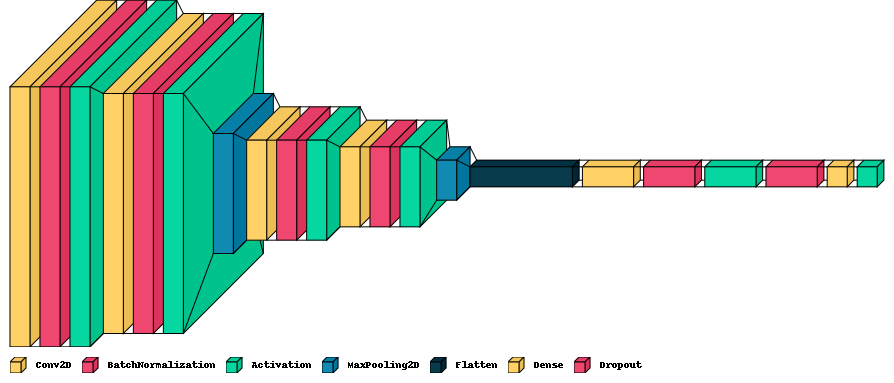

In [25]:
visualkeras.layered_view(model, scale_xy=10, legend=True)

In [26]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
# model.fit(x_train1,y_train1,validation_data = (x_val,y_val),epochs=1)
history = model.fit(x_train1,y_train1, epochs=10, validation_data=(x_val, y_val))


Epoch 1/10
1182/1182 [==============================] - 134s 110ms/step - loss: 0.1032 - accuracy: 0.9677 - val_loss: 0.0464 - val_accuracy: 0.9855
Epoch 2/10
1182/1182 [==============================] - 126s 107ms/step - loss: 0.0428 - accuracy: 0.9874 - val_loss: 0.0330 - val_accuracy: 0.9895
Epoch 3/10
1182/1182 [==============================] - 127s 107ms/step - loss: 0.0352 - accuracy: 0.9891 - val_loss: 0.0395 - val_accuracy: 0.9860
Epoch 4/10
1182/1182 [==============================] - 127s 108ms/step - loss: 0.0302 - accuracy: 0.9904 - val_loss: 0.0389 - val_accuracy: 0.9879
Epoch 5/10
1182/1182 [==============================] - 126s 107ms/step - loss: 0.0261 - accuracy: 0.9914 - val_loss: 0.0343 - val_accuracy: 0.9881
Epoch 6/10
1182/1182 [==============================] - 127s 107ms/step - loss: 0.0199 - accuracy: 0.9936 - val_loss: 0.0383 - val_accuracy: 0.9888
Epoch 7/10
1182/1182 [==============================] - 131s 110ms/step - loss: 0.0195 - accuracy: 0.9944 - val_

In [28]:
score = model.evaluate(x_val, y_val, verbose = 10 )
print ( 'Loss is :', score[0], '\nTraining Accuracy is :', score[1] )

Loss is : 0.025210238993167877 
Training Accuracy is : 0.9923809766769409


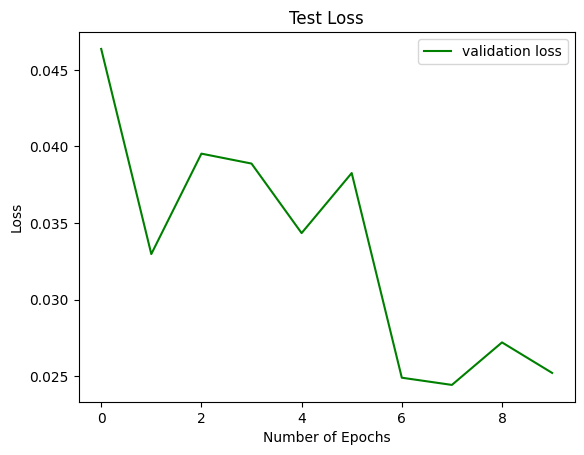

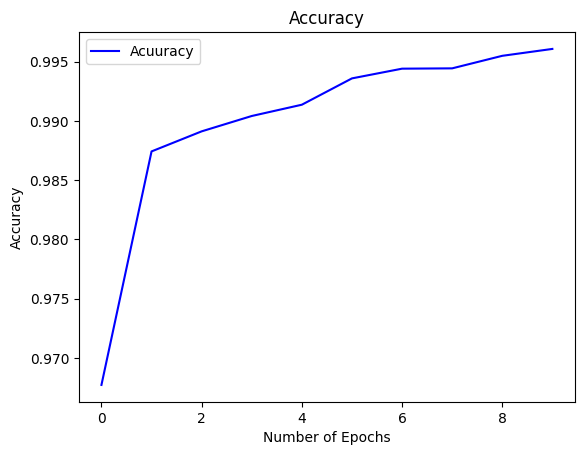

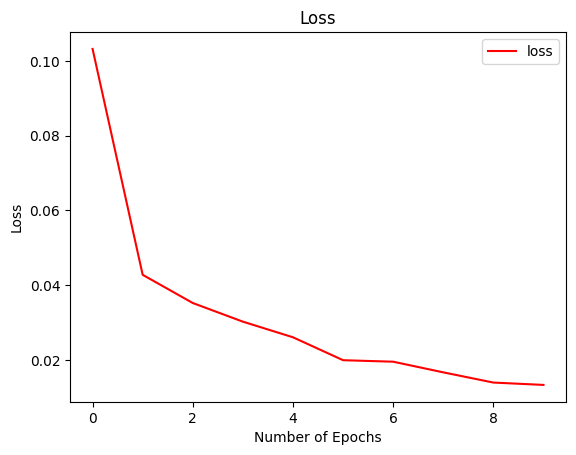

In [29]:
plt.plot(history.history['val_loss'], color='g', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
plt.plot(history.history['accuracy'], color='b', label="Acuuracy")
plt.title("Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
plt.plot(history.history['loss'], color='r', label="loss")
plt.title("Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Test Score: 0.025210238993167877
Test Accuracy: 0.9923809766769409


<Figure size 640x480 with 0 Axes>

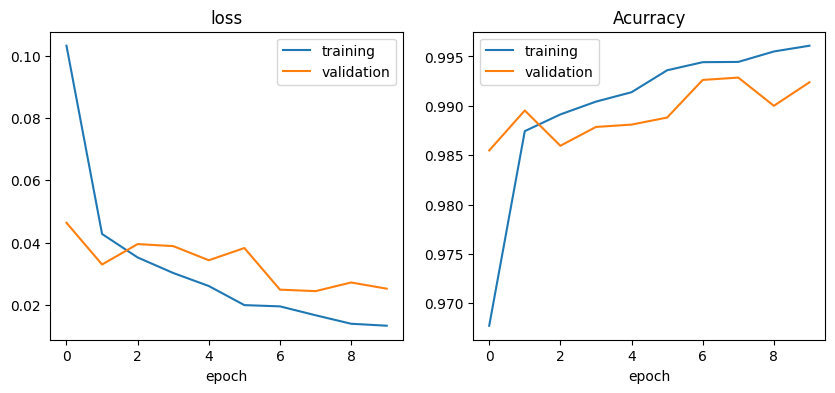

In [30]:
plt.figure()
fig,(ax1, ax2)=plt.subplots(1,2,figsize=(10,4))
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.legend(['training','validation'])
ax1.set_title('loss')
ax1.set_xlabel('epoch')

ax2.plot(history.history['accuracy'])
ax2.plot(history.history['val_accuracy'])
ax2.legend(['training','validation'])
ax2.set_title('Acurracy')
ax2.set_xlabel('epoch')



score =model.evaluate(x_val,y_val,verbose=0)
print('Test Score:',score[0])
print('Test Accuracy:',score[1])

In [31]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Dark2):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
          plt.text(j, i, cm[i, j],
                  horizontalalignment="center",
                  color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [32]:
predict_y=model.predict(x_val)
y_val_hat=np.argmax(predict_y,axis=1)
y_val_org = np.argmax(y_val, axis = 1)

132/132 [==============================] - 3s 22ms/step


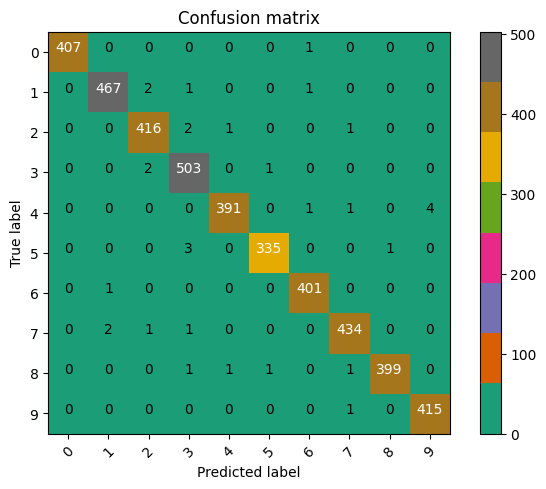

In [33]:
confusion_mtx = confusion_matrix(y_val_org, y_val_hat)
plot_confusion_matrix(confusion_mtx, classes = range(10))